In [127]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

data = pd.read_csv('data.csv')

# Perimeter_data
perimeter_data = data[['diagnosis','perimeter_mean', 'perimeter_se', 'perimeter_worst']]
diagnosis = pd.get_dummies(perimeter_data['diagnosis'], drop_first=True) #One hot encoding diagnosis
perimeter_data = pd.concat([perimeter_data, diagnosis], axis=1)
perimeter_data.drop(columns= ["diagnosis"], axis=1,inplace=True)

# Data normalization
#x = perimeter_data.values
#min_max_scaler = preprocessing.MinMaxScaler()
#x_scaled = min_max_scaler.fit_transform(x)
#perimeter_data = pd.DataFrame(x_scaled)

y = perimeter_data["M"]
X = perimeter_data.drop(columns=["M"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)


model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)

0.8991228070175439

[]

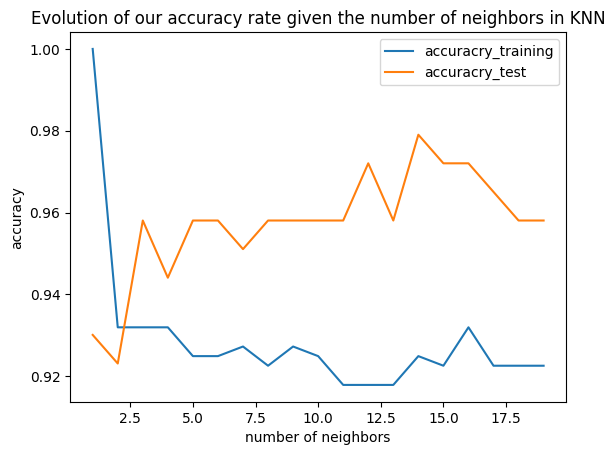

In [128]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

data = pd.read_csv('data.csv')

#IsNull
data.isna().sum()

#Data types
data.dtypes
ignore = ['diagnosis']
f_data = (data.set_index(ignore, append=True)
        .astype(float)
        .reset_index(ignore))

perimeter_data = f_data[['diagnosis','perimeter_mean', 'perimeter_se', 'perimeter_worst']]

diagnosis = pd.get_dummies(perimeter_data['diagnosis'], drop_first=True) #One hot encoding sex
perimeter_data = pd.concat([perimeter_data, diagnosis], axis=1)
perimeter_data.drop(columns= ["diagnosis"], axis=1,inplace=True)

y = perimeter_data["M"]
X = perimeter_data.drop(columns=["M"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)

hyperparam = [i for i in range(1,20)]
accuracy_training = []
accuracy_test = []

for k in hyperparam:
    #Training set
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    accuracy_training.append(accuracy_score(y_train, y_pred))
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy_test.append(accuracy_score(y_test, y_pred))
    
plt.plot(hyperparam, accuracy_training, label = "accuracry_training" )
plt.plot(hyperparam, accuracy_test, label = "accuracry_test" )
plt.title("Evolution of our accuracy rate given the number of neighbors in KNN")
plt.xlabel("number of neighbors")
plt.ylabel("accuracy")
plt.legend()
plt.plot()

# Iteration 2, 

In [129]:
#Explain why I choose my columns iteration 2

# Data normalization ? What is
#x = perimeter_data.values
#min_max_scaler = preprocessing.MinMaxScaler()
#x_scaled = min_max_scaler.fit_transform(x)m
#perimeter_data = pd.DataFrame(x_scaled)

KNN (accuracy) 0.965034965034965
KNN (f1_score) : 0.9494949494949495
KNN (roc) : 0.9519230769230769
SVM: (accuracy) 0.972027972027972
SVM: (f1_score) 0.9600000000000001
SVM: (roc) 0.9615384615384616
Decision Tree (accuracy): 0.8741258741258742
Decision Tree (f1_score): 0.8235294117647058
Decision Tree (roc) : 0.8598901098901098


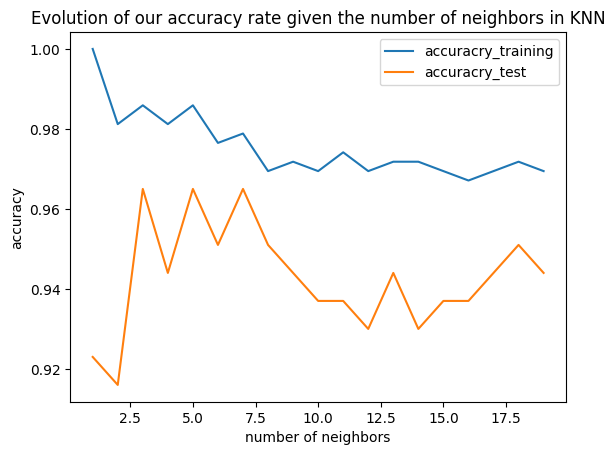

In [130]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
import random
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score


data = pd.read_csv('data.csv')

#IsNull
data.isna().sum()

#Data types
data.dtypes
ignore = ['diagnosis']
f_data = (data.set_index(ignore, append=True)
        .astype(float)
        .reset_index(ignore))

cleanData = f_data.drop(['fractal_dimension_worst', 'fractal_dimension_se', 'fractal_dimension_mean', 'id', 'area_se', 'Unnamed: 32'], axis=1)
# sns.heatmap(cleanData.corr(), vmin=-1, vmax=1, center=0, annot=True, fmt=".2f")

diagnosis = pd.get_dummies(cleanData['diagnosis'], drop_first=True) #One hot encoding diagnosis
cleanData = pd.concat([cleanData, diagnosis], axis=1)
cleanData.drop(columns= ["diagnosis"], axis=1,inplace=True)

x = cleanData.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
cleanData = pd.DataFrame(x_scaled)

y = cleanData[26]
X = cleanData.drop(columns=[26])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("KNN (accuracy)", accuracy_score(y_test, y_pred))
print("KNN (f1_score) :", f1_score(y_test, y_pred))
print("KNN (roc) :", roc_auc_score(y_test, y_pred))
hyperparam = [i for i in range(1,20)]
accuracy_training = []
accuracy_test = []

for k in hyperparam:
    #Training set
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    accuracy_training.append(accuracy_score(y_train, y_pred))
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy_test.append(accuracy_score(y_test, y_pred))

plt.plot(hyperparam, accuracy_training, label = "accuracry_training" )
plt.plot(hyperparam, accuracy_test, label = "accuracry_test" )
plt.title("Evolution of our accuracy rate given the number of neighbors in KNN")
plt.xlabel("number of neighbors")
plt.ylabel("accuracy")
plt.legend()
plt.plot()

model = make_pipeline(StandardScaler(), SVC(gamma='auto'))
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("SVM: (accuracy)", accuracy_score(y_test, y_pred))
print("SVM: (f1_score)", f1_score(y_test, y_pred))
print("SVM: (roc)", roc_auc_score(y_test, y_pred))

dtree = DecisionTreeClassifier() 
dtree.fit(X_train, y_train) 
y_pred = dtree.predict(X_test) 
clf = DecisionTreeClassifier() 
clf = clf.fit(X_train,y_train) 
y_pred = clf.predict(X_test) 
print("Decision Tree (accuracy):",accuracy_score(y_test, y_pred))
print("Decision Tree (f1_score):",f1_score(y_test, y_pred))
print("Decision Tree (roc) :", roc_auc_score(y_test, y_pred))


# Iteration 3, Backward Feature Elimination

In [133]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

lr = LogisticRegression(class_weight='balanced', random_state=42, n_jobs=-1)
lr = lr.fit(X_train, y_train)

backward_feature = SFS(lr, k_features=6, forward = False, n_jobs= -1, verbose=2 , scoring='accuracy') 
backward_feature.fit(X_train, y_train)

feature = list(backward_feature.k_feature_names_)
feature = list(map(int, feature)) 
lr.fit(X_train[feature], y_train)
y_pred = lr.predict(X_test[feature]) 

print ("backward_feature.k_feature_names_")

feature.append(26)
cleanData = cleanData[feature]

y = cleanData[26]
X = cleanData.drop(columns=[26])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
model = make_pipeline(StandardScaler(), SVC(gamma='auto'))
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("SVM: (accuracy)", accuracy_score(y_test, y_pred))
print("SVM: (f1_score)", f1_score(y_test, y_pred))
print("SVM: (roc)", roc_auc_score(y_test, y_pred))

cleanData


backward_feature.k_feature_names_
SVM: (accuracy) 0.972027972027972
SVM: (f1_score) 0.9649122807017544
SVM: (roc) 0.9738300492610839


,0,1,4,18,19,23,26
0,0.521037,0.022658,0.593753,0.141525,0.668310,0.568610,1.0
1,0.643144,0.272574,0.289880,0.303571,0.539818,0.192971,1.0
2,0.601496,0.390260,0.514309,0.360075,0.508442,0.359744,1.0
3,0.210090,0.360839,0.811321,0.385928,0.241347,0.548642,1.0
4,0.629893,0.156578,0.430351,0.123934,0.506948,0.319489,1.0
...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.526948,0.383262,0.576174,0.328035,1.0
565,0.622320,0.626987,0.407782,0.699094,0.520892,0.256789,1.0
566,0.455251,0.621238,0.288165,0.589019,0.379949,0.271805,1.0
567,0.644564,0.663510,0.588336,0.730277,0.668310,0.749760,1.0
